In [104]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random.mtrand import beta
import math

#np.random.seed = 0

# pt.1

In [105]:
class bandit:

  def __init__(self, p):
    self.p = p # a list of length k containing the probability of success for each arm
    self.k = len(p)

  def sample(self, index):
    # takes as input the index of an action and provides a reward sample (1 or 0)
    prob = self.p[index]
    return np.random.binomial(1, prob, 1)[0]


In [106]:
delta = 0.1
parameters = [0.5, 0.5-delta, 0.5-2*delta]
b = bandit(parameters)


In [107]:
# test
samples = np.zeros((3,50))
for i in range(50):
  samples[0][i] = b.sample(0)
  samples[1][i] = b.sample(1)
  samples[2][i] = b.sample(2)

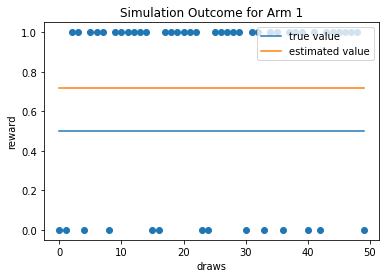

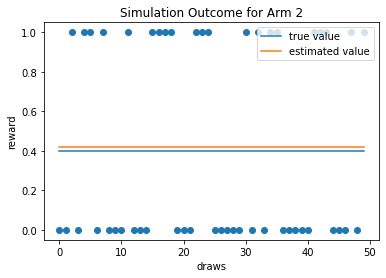

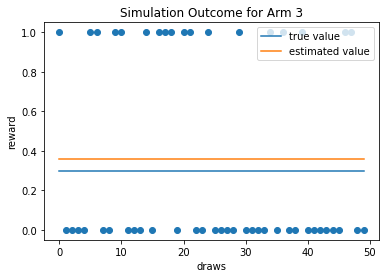

In [108]:
# plot
for arm in range(3):
  plt.scatter(np.arange(50), samples[arm][:])
  plt.plot(np.arange(50), np.full((50,), parameters[arm]), label="true value")
  plt.plot(np.arange(50), np.full((50,), np.mean(samples[arm][:])), label="estimated value")
  plt.xlabel("draws")
  plt.ylabel("reward")
  plt.title("Simulation Outcome for Arm "+str(arm+1))
  plt.legend(loc='upper right')
  plt.show()

# pt.2

In [109]:
def update(Q, lr, curr_reward, arm):
  Q[arm] = Q[arm] + lr*(curr_reward-Q[arm])
  return Q[arm]

def updateAvg(Q, n, curr_reward, arm):
  Q[arm] = Q[arm] + (1/n)*(curr_reward-Q[arm])
  return Q[arm]

In [110]:
q_001 = np.zeros(3)
q_01 = np.zeros(3)
q_avg = np.zeros(3)
plot_q_001 = np.zeros((3, 51))
plot_q_01 = np.zeros((3, 51))
plot_q_avg = np.zeros((3, 51))

for arm in range(3):
  for idx,data in enumerate(samples[arm][:]):
    plot_q_001[arm][idx+1] = update(q_001, 0.01, data, arm)
    plot_q_01[arm][idx+1] = update(q_01, 0.1, data, arm)
    plot_q_avg[arm][idx+1] = updateAvg(q_avg, idx+1, data, arm)

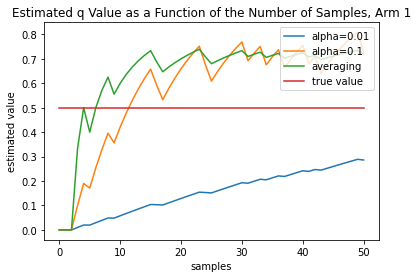

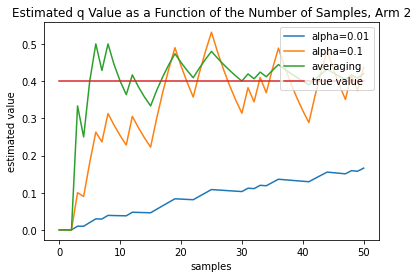

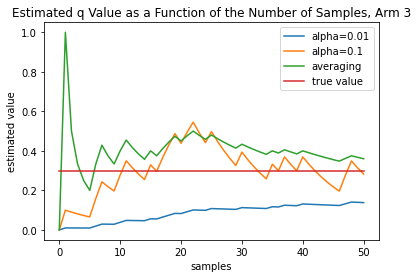

In [111]:
for arm in range(3):
  plt.plot(np.arange(51), plot_q_001[arm][:], label="alpha=0.01")
  plt.plot(np.arange(51), plot_q_01[arm][:], label="alpha=0.1")
  plt.plot(np.arange(51), plot_q_avg[arm][:], label="averaging")
  plt.plot(np.arange(51), np.full((51,), parameters[arm]), label="true value")
  plt.xlabel("samples")
  plt.ylabel("estimated value")
  plt.title("Estimated q Value as a Function of the Number of Samples, Arm "+str(arm+1))
  plt.legend(loc='upper right')
  plt.show()

# pt.3

In [112]:
all_q_001 = np.zeros((3, 101, 100))
all_q_01 = np.zeros((3, 101, 100))
all_q_avg = np.zeros((3, 101, 100))

for run in range(100):

  q_001 = np.zeros(3)
  q_01 = np.zeros(3)
  q_avg = np.zeros(3)

  samples = np.zeros((3,100))
  for i in range(100):
    samples[0][i] = b.sample(0)
    samples[1][i] = b.sample(1)
    samples[2][i] = b.sample(2)

  for arm in range(3):
    for idx,data in enumerate(samples[arm][:]):
      all_q_001[arm][idx+1][run] = update(q_001, 0.01, data, arm)
      all_q_01[arm][idx+1][run] = update(q_01, 0.1, data, arm)
      all_q_avg[arm][idx+1][run] = updateAvg(q_avg, idx+1, data, arm)


In [113]:
plot_q_001 = np.mean(all_q_001, axis=2)
q_001_stderr = np.std(all_q_001, axis=2)/10
plot_q_01 = np.mean(all_q_01, axis=2)
q_01_stderr = np.std(all_q_01, axis=2)/10
plot_q_avg = np.mean(all_q_avg, axis=2)
q_avg_stderr = np.std(all_q_avg, axis=2)/10

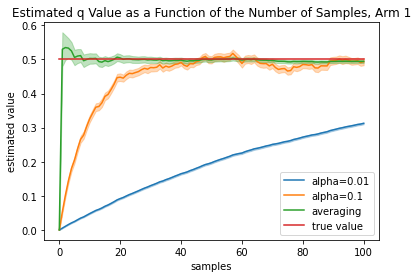

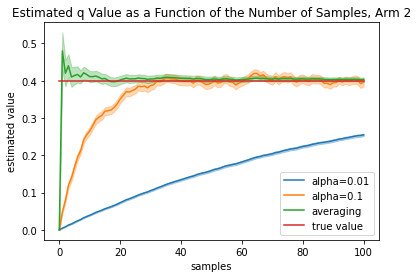

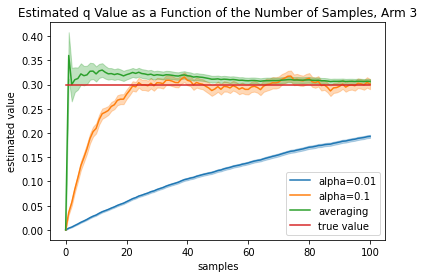

In [114]:
for arm in range(3):

  plt.plot(np.arange(101), plot_q_001[arm], label="alpha=0.01", color='C0')
  plt.fill_between(np.arange(101), plot_q_001[arm]-q_001_stderr[arm], plot_q_001[arm]+q_001_stderr[arm], color='C0', alpha=0.3)
  
  plt.plot(np.arange(101), plot_q_01[arm], label="alpha=0.1", color='C1')
  plt.fill_between(np.arange(101), plot_q_01[arm]-q_01_stderr[arm], plot_q_01[arm]+q_01_stderr[arm], color='C1', alpha=0.3)

  plt.plot(np.arange(101), plot_q_avg[arm], label="averaging", color='C2')
  plt.fill_between(np.arange(101), plot_q_avg[arm]-q_avg_stderr[arm], plot_q_avg[arm]+q_avg_stderr[arm], color='C2', alpha=0.3)
  
  plt.plot(np.arange(101), np.full((101,), parameters[arm]), label="true value", color='C3')
  
  plt.xlabel("samples")
  plt.ylabel("estimated value")
  plt.title("Estimated q Value as a Function of the Number of Samples, Arm "+str(arm+1))
  plt.legend(loc='lower right')
  plt.show()

## Discussion
Which of the alpha values is better: alpha=0.1 is better because the estimate converges to the true value faster.

How do they compare to averaging: when averaged across 100 runs, the estimate of the "averaging" update method reaches the true value almost instantly, whereas using different learning rates reaches the true value gradually.

If you wanted to optimize further, in what range of alpha would you look for better values: I would try alpha values around 0.2, so that the algorithm could reach the true value with less samples, but still have a relatively smooth curve.

# pt.4

In [115]:
def epsilon_greedy(epsilon, q):

  if (np.random.rand() < epsilon):
    action = np.random.randint(0,3) # pick a random action
  else:
    action = random.choice(np.ndarray.flatten(np.argwhere(q == np.amax(q)))) # greedy

  return action

In [116]:
epsilons = [0, 1/8, 1/4, 1/2, 1]
all_rewards = np.zeros((len(epsilons), 100, 1000))
cum_rewards = np.zeros((len(epsilons), 100, 1000))
estimated_best_actions = np.zeros((len(epsilons), 100, 1000))
regret = np.zeros((len(epsilons), 100, 1000))
total_regret = np.zeros((len(epsilons), 100, 1000))

for r in range(100):
  for i,e in enumerate(epsilons):
    q = np.zeros(3)
    n = np.zeros(3)
    for t in range(1000):
      # epsilon greedy algorithm
      action = epsilon_greedy(e,q)
      all_rewards[i,r,t] = b.sample(action)
      cum_rewards[i,r,t] = np.mean(all_rewards[i,r][0:t+1])
      # find best actions
      estimated_best_actions[i,r,t] = random.choice(np.ndarray.flatten(np.argwhere(q == np.amax(q))))
      # update
      n[action] += 1
      q[action] = updateAvg(q, n[action], all_rewards[i,r,t], action)
      # regret
      regret[i,r,t] = 0.5-parameters[action]
      total_regret[i,r,t] = np.sum(regret[i,r,:])
      

In [117]:
avg_rewards = np.mean(cum_rewards, axis=1)
rewards_stderr = np.std(cum_rewards, axis=1)/10
frac_best_actions = (np.count_nonzero(estimated_best_actions==0, axis=1))/100
instantanous_regret = np.mean(regret, axis=1)
plot_total_regret = np.mean(total_regret, axis=1)

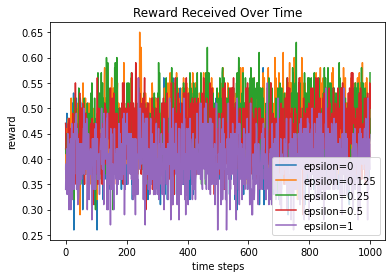

In [161]:
aaaavg = np.mean(all_rewards, axis=1)
for i in range(5):
  plt.plot(np.arange(1000), aaaavg[i], label="epsilon="+str(epsilons[i]), color='C'+str(i))

plt.xlabel("time steps")
plt.ylabel("reward")
plt.title("Reward Received Over Time")
plt.legend(loc='lower right')
plt.show()

## a

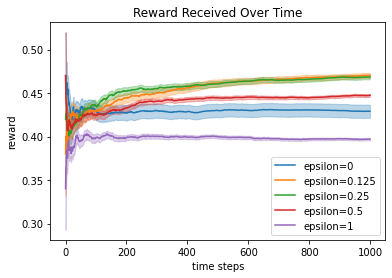

In [118]:
for i in range(5):
  plt.plot(np.arange(1000), avg_rewards[i][:], label="epsilon="+str(epsilons[i]), color='C'+str(i))
  plt.fill_between(np.arange(1000), avg_rewards[i]-rewards_stderr[i], avg_rewards[i]+rewards_stderr[i], color='C'+str(i), alpha=0.3)

plt.xlabel("time steps")
plt.ylabel("reward")
plt.title("Reward Received Over Time")
plt.legend(loc='lower right')
plt.show()

When epsilon is too small (0 - no exploration) or too large (1 - always select action randomly), the amount of reward received is small. When there is a balance between exploration and exploitation (epsilon=1/8, 1/4), the algorithm has a better chance of choosing the optimal action and the reward received is higher.

## b

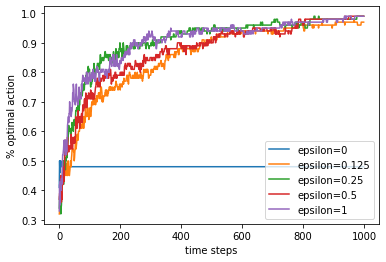

In [119]:
for i in range(5):
  plt.plot(np.arange(1000), frac_best_actions[i][:], label="epsilon="+str(epsilons[i]))

plt.xlabel("time steps")
plt.ylabel("% optimal action")
plt.legend(loc='lower right')
plt.show()

When epsilon equals 0, the algorithm is greedy and never explores, therefore it can get stuck on a suboptimal action and have a constant low percentage. When there's little exploration (epsilon=1/8), the % optimal action increases slowly. The % optimal action increases more quickly with more exploration (epsilon=1/4, 1/2, 1).

## c

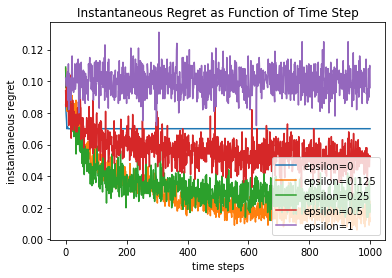

In [120]:
for i in range(5):
  plt.plot(np.arange(1000), instantanous_regret[i][:], label="epsilon="+str(epsilons[i]))

plt.xlabel("time steps")
plt.ylabel("instantaneous regret")
plt.title("Instantaneous Regret as Function of Time Step")
plt.legend(loc='lower right')
plt.show()

When epsilon equals 0, the algorithm is stuck on a suboptimal action and the instantaneous regret is constant and relatively high (line on graph may be blocked). When epsilon equals 1, the algorithm always pick actions randomly and the average instantaneous regret is generally high. When there is a balance between exploration and exploitation, the instantaneous regret decreases over time steps

## d

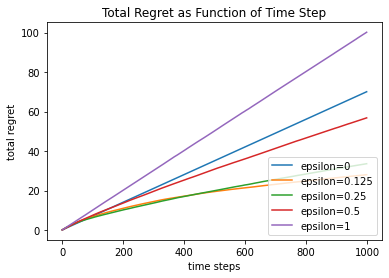

In [121]:
for i in range(5):
  plt.plot(np.arange(1000), plot_total_regret[i][:], label="epsilon="+str(epsilons[i]))

plt.xlabel("time steps")
plt.ylabel("total regret")
plt.title("Total Regret as Function of Time Step")
plt.legend(loc='lower right')
plt.show()

The total regret as a function of time step is linear for all epsilon values, as expected. The slope of the line is steep for epsilon equals 0 and 1, and shallower for other values. This is consistant with previous graphs. The algorithm performs the best when epsilon is 1/8 or 1/4 (more rewards, less loss).

# pt.5

In [122]:
epsilons2 = [1/8, 1/4]
alphas = [0.1, 0.01, 0.001]
all_rewards2 = np.zeros((len(epsilons2), 100, len(alphas), 1000))
cum_rewards2 = np.zeros((len(epsilons2), 100, len(alphas), 1000))
estimated_best_actions2 = np.zeros((len(epsilons2), 100, len(alphas), 1000))
regret2 = np.zeros((len(epsilons2), 100, len(alphas), 1000))
total_regret2 = np.zeros((len(epsilons2), 100, len(alphas), 1000))

for r in range(100):
  for i,e in enumerate(epsilons2):
    for j,a in enumerate(alphas):
      q = np.zeros(3)
      for t in range(1000):
        # epsilon greedy algorithm
        action = epsilon_greedy(e,q)
        all_rewards2[i,r,j,t] = b.sample(action)
        cum_rewards2[i,r,j,t] = np.mean(all_rewards2[i,r,j][0:t+1])
        # find best actions
        estimated_best_actions2[i,r,j,t] = random.choice(np.ndarray.flatten(np.argwhere(q == np.amax(q))))
        # update
        q[action] = update(q, a, all_rewards2[i,r,j,t], action)
        # regret
        regret2[i,r,j,t] = 0.5-parameters[action]
        total_regret2[i,r,j,t] = np.sum(regret2[i,r,j,:])

In [123]:
avg_rewards2 = np.mean(cum_rewards2, axis=1)
rewards2_stderr = np.std(cum_rewards2, axis=1)/10
frac_best_actions2 = (np.count_nonzero(estimated_best_actions2==0, axis=1))/100
instantanous_regret2 = np.mean(regret2, axis=1)
plot_total_regret2 = np.mean(total_regret2, axis=1)

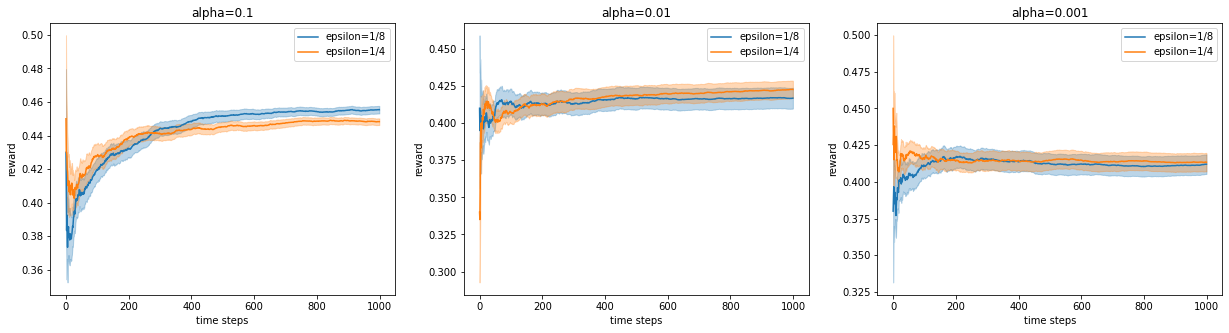

In [124]:
fig, axs = plt.subplots(1,3,figsize=(21,5))

for i in range(3):

  axs[i].plot(np.arange(1000), avg_rewards2[0,i,:], label="epsilon=1/8", color='C0')
  axs[i].fill_between(np.arange(1000), avg_rewards2[0,i]-rewards2_stderr[0,i], avg_rewards2[0,i]+rewards2_stderr[0,i], color='C0', alpha=0.3)
  axs[i].plot(np.arange(1000), avg_rewards2[1,i,:], label="epsilon=1/4", color='C1')
  axs[i].fill_between(np.arange(1000), avg_rewards2[1,i]-rewards2_stderr[1,i], avg_rewards2[1,i]+rewards2_stderr[1,i], color='C1', alpha=0.3)

  axs[i].set_title("alpha="+str(alphas[i]))
  axs[i].set_xlabel("time steps")
  axs[i].set_ylabel("reward")
  axs[i].legend()

plt.show()

When alpha=0.1, the reward increases with more time steps. With smaller learning rates, the reward doesn't significantly increase within 1000 time steps. Different epsilon values perform similarily.

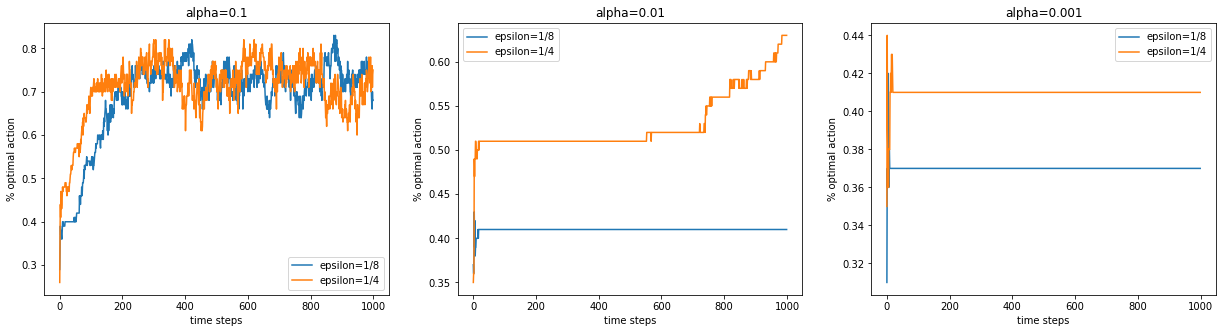

In [125]:
fig, axs = plt.subplots(1,3,figsize=(21,5))

for i in range(3):
  axs[i].plot(np.arange(1000), frac_best_actions2[0,i,:], label="epsilon=1/8")
  axs[i].plot(np.arange(1000), frac_best_actions2[1,i,:], label="epsilon=1/4")
  axs[i].set_title("alpha="+str(alphas[i]))
  axs[i].set_xlabel("time steps")
  axs[i].set_ylabel("% optimal action")
  axs[i].legend()

plt.show()

The fraction of runs in which the estimated best action is the true best action increases over time steps when alpha=0.1 and reaches around 80% at the 1000th time step. When the learning rate is too small, the algorithm is unable to adjust its estimate quickly enough, therefore the % optimal action stays low throughout 1000 time steps.

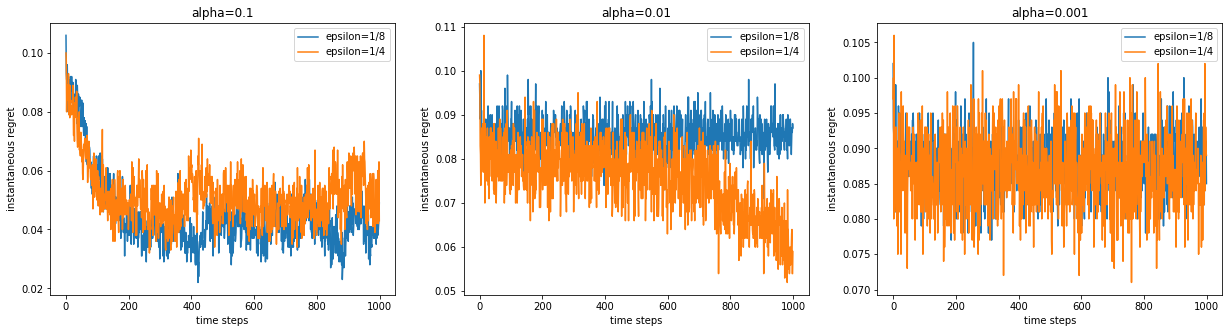

In [126]:
fig, axs = plt.subplots(1,3,figsize=(21,5))

for i in range(3):
  axs[i].plot(np.arange(1000), instantanous_regret2[0,i,:], label="epsilon=1/8")
  axs[i].plot(np.arange(1000), instantanous_regret2[1,i,:], label="epsilon=1/4")
  axs[i].set_title("alpha="+str(alphas[i]))
  axs[i].set_xlabel("time steps")
  axs[i].set_ylabel("instantaneous regret")
  axs[i].legend()

plt.show()

The instantaneous regret decreases when alpha=0.1 but not (much) when alpha=0.01 or 0.001

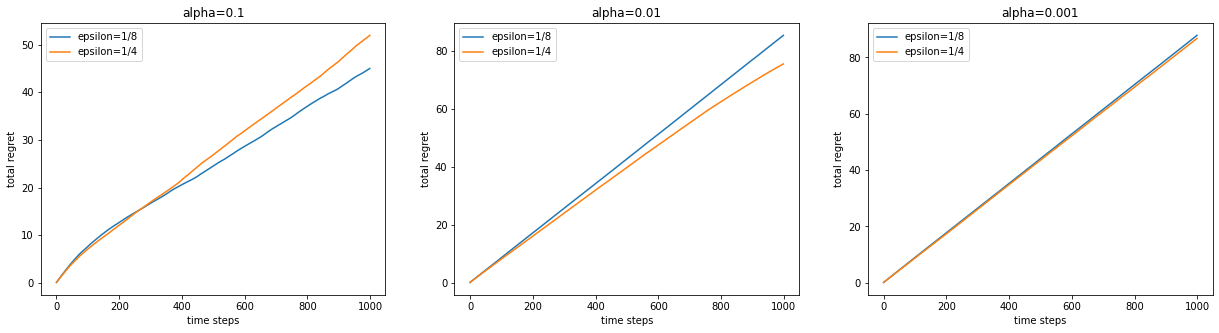

In [127]:
fig, axs = plt.subplots(1,3,figsize=(21,5))

for i in range(3):
  axs[i].plot(np.arange(1000), plot_total_regret2[0,i,:], label="epsilon=1/8")
  axs[i].plot(np.arange(1000), plot_total_regret2[1,i,:], label="epsilon=1/4")
  axs[i].set_title("alpha="+str(alphas[i]))
  axs[i].set_xlabel("time steps")
  axs[i].set_ylabel("total regret")
  axs[i].legend()

plt.show()

The total regret as a function of time steps is linear for all hyperparameter values, as expected. The slope of the total regret line is higher when alpha=0.01 and 0.001. epsilon=1/8 is slightly better than epsilon=1/4.

# pt.6

In [128]:
def UCB(c, q, n, t):
  # q and n are arrays shape (3,)
  # calculate the value of each action
  values = q + c*np.sqrt(math.log(t)/n)
  action = random.choice(np.ndarray.flatten(np.argwhere(values == np.amax(values))))
  return action

In [129]:
c = 2
alphas = [0.1, 0.01, 0.001]
all_rewards3 = np.zeros((len(alphas)+1, 100, 1000))
cum_rewards3 = np.zeros((len(alphas)+1, 100, 1000))
estimated_best_actions3 = np.zeros((len(alphas)+1, 100, 1000))
regret3 = np.zeros((len(alphas)+1, 100, 1000))
total_regret3 = np.zeros((len(alphas)+1, 100, 1000))

for r in range(100):
  for i,a in enumerate(alphas):
    q = np.zeros(3)
    n = np.zeros(3)
    for t in range(1000):
      if t < 3:
        action = t # try each arm once before computing the exploration bonuses to avoid 0 in denominator
      else:
        action = UCB(c, q, n, t+1)      
      all_rewards3[i,r,t] = b.sample(action)
      cum_rewards3[i,r,t] = np.mean(all_rewards3[i,r][0:t+1])
      # find best actions
      estimated_best_actions3[i,r,t] = random.choice(np.ndarray.flatten(np.argwhere(q == np.amax(q))))
      # update
      n[action] += 1
      q[action] = update(q, a, all_rewards3[i,r,t], action)
      # regret
      regret3[i,r,t] = 0.5-parameters[action]
      total_regret3[i,r,t] = np.sum(regret3[i,r,:])

In [130]:
# averaging
for r in range(100):
  q = np.zeros(3)
  n = np.zeros(3)
  for t in range(1000):
    if t < 3:
      action = t
    else:
      action = UCB(c, q, n, t+1)      
    all_rewards3[3,r,t] = b.sample(action)
    cum_rewards3[3,r,t] = np.mean(all_rewards3[3,r][0:t+1])
    # find best actions
    estimated_best_actions3[3,r,t] = random.choice(np.ndarray.flatten(np.argwhere(q == np.amax(q))))
    # update
    n[action] += 1
    q[action] = updateAvg(q, n[action], all_rewards3[3,r,t], action)
    # regret
    regret3[3,r,t] = 0.5-parameters[action]
    total_regret3[3,r,t] = np.sum(regret3[3,r,:])

In [131]:
avg_rewards3 = np.mean(cum_rewards3, axis=1)
rewards3_stderr = np.std(cum_rewards3, axis=1)/10
frac_best_actions3 = (np.count_nonzero(estimated_best_actions3==0, axis=1))/100
instantanous_regret3 = np.mean(regret3, axis=1)
plot_total_regret3 = np.mean(total_regret3, axis=1)

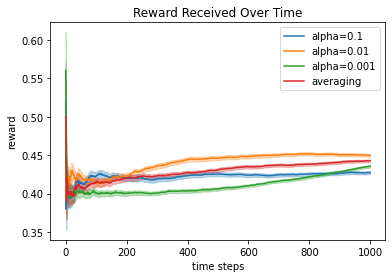

In [132]:
for i in range(3):
  plt.plot(np.arange(1000), avg_rewards3[i][:], label="alpha="+str(alphas[i]), color='C'+str(i))
  plt.fill_between(np.arange(1000), avg_rewards3[i]-rewards3_stderr[i], avg_rewards3[i]+rewards3_stderr[i], color='C'+str(i), alpha=0.3)

plt.plot(np.arange(1000), avg_rewards3[3], label="averaging", color='C3')
plt.fill_between(np.arange(1000), avg_rewards3[3]-rewards3_stderr[3], avg_rewards3[3]+rewards3_stderr[3], color='C3', alpha=0.3)

plt.xlabel("time steps")
plt.ylabel("reward")
plt.title("Reward Received Over Time")
plt.legend(loc='upper right')
plt.show()

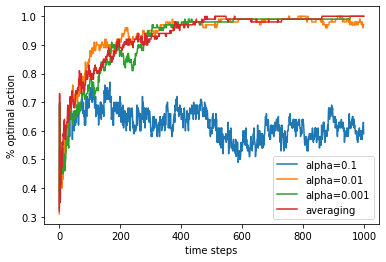

In [133]:
for i in range(3):
  plt.plot(np.arange(1000), frac_best_actions3[i][:], label="alpha="+str(alphas[i]))

plt.plot(np.arange(1000), frac_best_actions3[3], label="averaging")

plt.xlabel("time steps")
plt.ylabel("% optimal action")
plt.legend(loc='lower right')
plt.show()

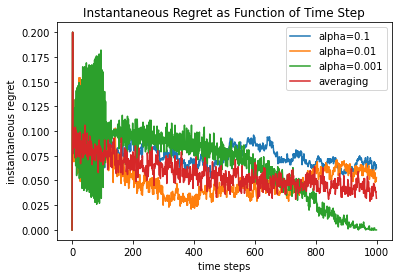

In [134]:
for i in range(3):
  plt.plot(np.arange(1000), instantanous_regret3[i][:], label="alpha="+str(alphas[i]))

plt.plot(np.arange(1000), instantanous_regret3[3], label="averaging")

plt.xlabel("time steps")
plt.ylabel("instantaneous regret")
plt.title("Instantaneous Regret as Function of Time Step")
plt.legend(loc='upper right')
plt.show()

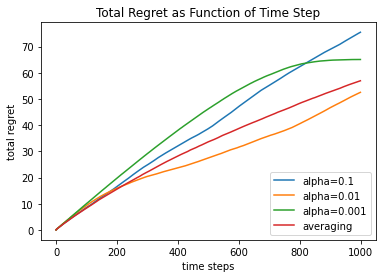

In [135]:
for i in range(3):
  plt.plot(np.arange(1000), plot_total_regret3[i][:], label="alpha="+str(alphas[i]))

plt.plot(np.arange(1000), plot_total_regret3[3], label="averaging")

plt.xlabel("time steps")
plt.ylabel("total regret")
plt.title("Total Regret as Function of Time Step")
plt.legend(loc='lower right')
plt.show()

Overall, these graphs show that when alpha=0.1, the learning rate is too large and the algorithm doesn't converge. alpha=0.001 yields the best result, as the total regret function has a logorithmic shape. alpha=0.01 and averaging perform similarily.

# pt.7

In [136]:
def thompsonSampling(parameters):
  # sample from current distribution
  samples = np.zeros((3))
  for i,p in enumerate(parameters):
    samples[i] = np.random.beta(p[0]+1, p[1]+1)
  # pick the action with the highest value
  action = random.choice(np.ndarray.flatten(np.argwhere(samples == np.amax(samples))))
  return action

In [137]:
all_rewards4 = np.zeros((100, 1000))
cum_rewards4 = np.zeros((100, 1000))
estimated_best_actions4 = np.zeros((100, 1000))
regret4 = np.zeros((100, 1000))
total_regret4 = np.zeros((100, 1000))

for r in range(100):
  beta_dist_params = np.zeros([3,2])
  for t in range(1000):
    action = thompsonSampling(beta_dist_params)   
    estimated_best_actions4[r,t] = action   
    all_rewards4[r,t] = b.sample(action)
    cum_rewards4[r,t] = np.mean(all_rewards4[r][0:t+1])
    # update
    if all_rewards4[r,t] == 1:
      beta_dist_params[action,0] += 1
    else:
      beta_dist_params[action,1] += 1
    # regret
    regret4[r,t] = 0.5-parameters[action]
    total_regret4[r,t] = np.sum(regret4[r,:])

In [138]:
avg_rewards4 = np.mean(cum_rewards4, axis=0)
rewards4_stderr = np.std(cum_rewards4, axis=0)/10
frac_best_actions4 = (np.count_nonzero(estimated_best_actions4==0, axis=0))/100
instantanous_regret4 = np.mean(regret4, axis=0)
plot_total_regret4 = np.mean(total_regret4, axis=0)

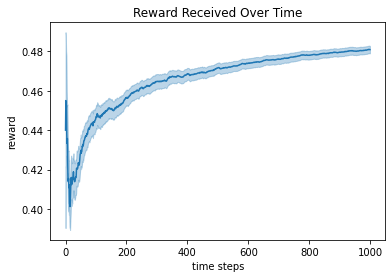

In [139]:
plt.plot(np.arange(1000), avg_rewards4, color='C0')
plt.fill_between(np.arange(1000), avg_rewards4-rewards4_stderr, avg_rewards4+rewards4_stderr, color='C0', alpha=0.3)

plt.xlabel("time steps")
plt.ylabel("reward")
plt.title("Reward Received Over Time")
plt.show()

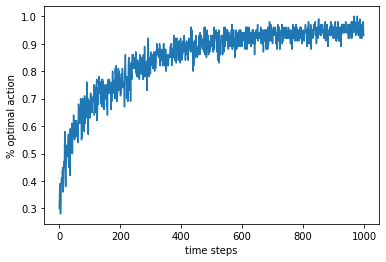

In [140]:
plt.plot(np.arange(1000), frac_best_actions4)

plt.xlabel("time steps")
plt.ylabel("% optimal action")
plt.show()

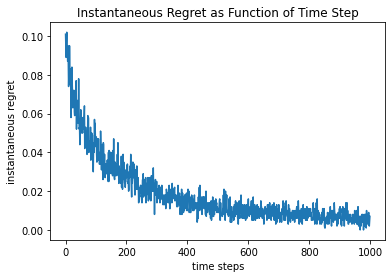

In [141]:
plt.plot(np.arange(1000), instantanous_regret4)

plt.xlabel("time steps")
plt.ylabel("instantaneous regret")
plt.title("Instantaneous Regret as Function of Time Step")
plt.show()

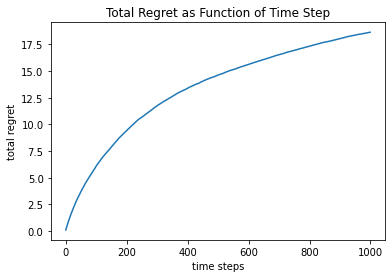

In [142]:
plt.plot(np.arange(1000), plot_total_regret4)

plt.xlabel("time steps")
plt.ylabel("total regret")
plt.title("Total Regret as Function of Time Step")
plt.show()

Based on these four graphs, Thompson sampling performs very well overall. The reward and % optimal action increases quickly through time steps, the instantaneous regret decreases, and the total regret function has a log shape.

# pt.8

best hyperparameters:
*   epsilon-greedy: epsilon=1/8, averaging
*   UCB: alpha=0.001
*   Thompson Sampling: hyperparameters are not explored here; could try to tune the initial alpha and beta values.

Best hyperparameter means that it results in the highest reward and % optimal action, and lowest instantaneous regret. Its total regret function should be log shaped (when possible) or have the shallowest slop.

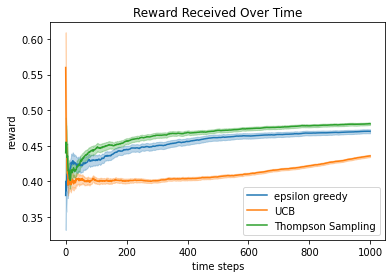

In [143]:
plt.plot(np.arange(1000), avg_rewards[1], label="epsilon greedy", color='C0')
plt.fill_between(np.arange(1000), avg_rewards[1]-rewards_stderr[1], avg_rewards[1]+rewards_stderr[1], color='C0', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards3[2], label="UCB", color='C1')
plt.fill_between(np.arange(1000), avg_rewards3[2]-rewards3_stderr[2], avg_rewards3[2]+rewards3_stderr[2], color='C1', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards4, label="Thompson Sampling", color='C2')
plt.fill_between(np.arange(1000), avg_rewards4-rewards4_stderr, avg_rewards4+rewards4_stderr, color='C2', alpha=0.3)

plt.xlabel("time steps")
plt.ylabel("reward")
plt.title("Reward Received Over Time")
plt.legend(loc='lower right')
plt.show()

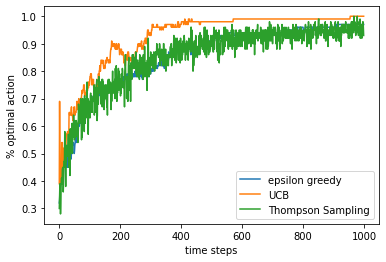

In [144]:
plt.plot(np.arange(1000), frac_best_actions[1], label="epsilon greedy")
plt.plot(np.arange(1000), frac_best_actions3[2], label="UCB")
plt.plot(np.arange(1000), frac_best_actions4, label="Thompson Sampling")

plt.xlabel("time steps")
plt.ylabel("% optimal action")
plt.legend(loc='lower right')
plt.show()

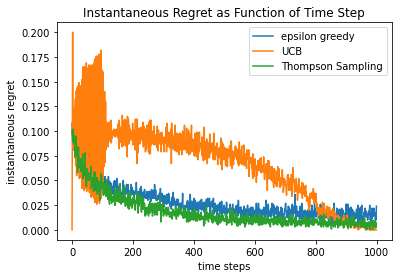

In [145]:
plt.plot(np.arange(1000), instantanous_regret[1], label="epsilon greedy")
plt.plot(np.arange(1000), instantanous_regret3[2], label="UCB")
plt.plot(np.arange(1000), instantanous_regret4, label="Thompson Sampling")

plt.xlabel("time steps")
plt.ylabel("instantaneous regret")
plt.title("Instantaneous Regret as Function of Time Step")
plt.legend(loc='upper right')
plt.show()

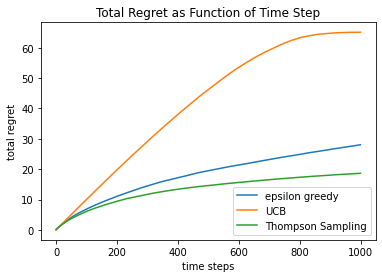

In [146]:
plt.plot(np.arange(1000), plot_total_regret[1], label="epsilon greedy")
plt.plot(np.arange(1000), plot_total_regret3[2], label="UCB")
plt.plot(np.arange(1000), plot_total_regret4, label="Thompson Sampling")

plt.xlabel("time steps")
plt.ylabel("total regret")
plt.title("Total Regret as Function of Time Step")
plt.legend(loc='lower right')
plt.show()

Overall, Thompson Sampling is slightly better than epsilon greedy in all four graphs. UCB has lower reward, slightly higher % optimal action, slightly lower final instantaneous regret, and much higher total regret than the other two algorithms.

# pt.9

In [148]:
delta = 0.1
alpha = 0.1
epsilons2 = [1/8, 1/4]
# four lines for epsilon greedy, two lines for UCB, one line for TS
all_rewards5 = np.zeros((7, 100, 1000))
cum_rewards5 = np.zeros((7, 100, 1000))

## epsilon greedy

In [149]:
# updateAvg
for r in range(100):
  for i,e in enumerate(epsilons2):
    parameters = [0.5, 0.5-delta, 0.5-2*delta]
    b = bandit(parameters)
    n = np.zeros((3))
    q = np.zeros((3))
    for t in range(1000):
      if t == 500:
        parameters = [0.5, 0.5+delta, 0.5+2*delta]
        b = bandit(parameters)
      action = epsilon_greedy(e,q)
      all_rewards5[i,r,t] = b.sample(action)
      cum_rewards5[i,r,t] = np.mean(all_rewards5[i,r][0:t+1])
      n[action] += 1
      q[action] = updateAvg(q, n[action], all_rewards5[i,r,t], action)

# update
for r in range(100):
  for i,e in enumerate(epsilons2):
    parameters = [0.5, 0.5-delta, 0.5-2*delta]
    b = bandit(parameters)
    q = np.zeros((3))
    for t in range(1000):
      if t == 500:
        parameters = [0.5, 0.5+delta, 0.5+2*delta]
        b = bandit(parameters)
      action = epsilon_greedy(e,q)
      all_rewards5[i+2,r,t] = b.sample(action)
      cum_rewards5[i+2,r,t] = np.mean(all_rewards5[i+2,r][0:t+1])
      q[action] = update(q, alpha, all_rewards5[i+2,r,t], action)

## UCB

In [155]:
c=2

# updateAvg
for r in range(100):
    parameters = [0.5, 0.5-delta, 0.5-2*delta]
    b = bandit(parameters)
    n = np.zeros((3))
    q = np.zeros((3))
    for t in range(1000):
      if t == 500:
        parameters = [0.5, 0.5+delta, 0.5+2*delta]
        b = bandit(parameters)
      if t < 3:
        action = t
      else:
        action = UCB(c, q, n, t+1) 
      all_rewards5[4,r,t] = b.sample(action)
      cum_rewards5[4,r,t] = np.mean(all_rewards5[4,r][0:t+1])
      n[action] += 1
      q[action] = updateAvg(q, n[action], all_rewards5[4,r,t], action)

# update
for r in range(100):
    parameters = [0.5, 0.5-delta, 0.5-2*delta]
    b = bandit(parameters)
    n = np.zeros((3))
    q = np.zeros((3))
    for t in range(1000):
      if t == 500:
        parameters = [0.5, 0.5+delta, 0.5+2*delta]
        b = bandit(parameters)
      if t < 3:
        action = t
      else:
        action = UCB(c, q, n, t+1) 
      all_rewards5[5,r,t] = b.sample(action)
      cum_rewards5[5,r,t] = np.mean(all_rewards5[5,r][0:t+1])
      n[action] += 1
      q[action] = update(q, alpha, all_rewards5[5,r,t], action)

## Thompson Sampling

In [158]:
for r in range(100):
  parameters = [0.5, 0.5-delta, 0.5-2*delta]
  b = bandit(parameters)
  beta_dist_params = np.zeros([3,2])
  for t in range(1000):
    if t == 500:
      parameters = [0.5, 0.5+delta, 0.5+2*delta]
      b = bandit(parameters)
    action = thompsonSampling(beta_dist_params)   
    all_rewards5[6,r,t] = b.sample(action)
    cum_rewards5[6,r,t] = np.mean(all_rewards5[6,r][0:t+1])
    # update
    if all_rewards5[6,r,t] == 1:
      beta_dist_params[action,0] += 1
    else:
      beta_dist_params[action,1] += 1

## plot

In [159]:
avg_rewards5 = np.mean(cum_rewards5, axis=1)
rewards5_stderr = np.std(cum_rewards5, axis=1)/10

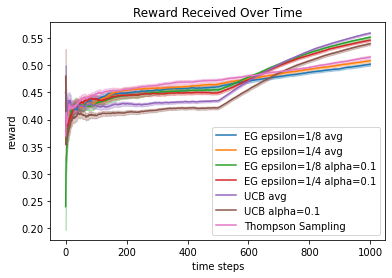

In [160]:
plt.plot(np.arange(1000), avg_rewards5[0], label="EG epsilon=1/8 avg", color='C0')
plt.fill_between(np.arange(1000), avg_rewards5[0]-rewards5_stderr[0], avg_rewards5[0]+rewards5_stderr[0], color='C0', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards5[1], label="EG epsilon=1/4 avg", color='C1')
plt.fill_between(np.arange(1000), avg_rewards5[1]-rewards5_stderr[1], avg_rewards5[1]+rewards5_stderr[1], color='C1', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards5[2], label="EG epsilon=1/8 alpha=0.1", color='C2')
plt.fill_between(np.arange(1000), avg_rewards5[2]-rewards5_stderr[2], avg_rewards5[2]+rewards5_stderr[2], color='C2', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards5[3], label="EG epsilon=1/4 alpha=0.1", color='C3')
plt.fill_between(np.arange(1000), avg_rewards5[3]-rewards5_stderr[3], avg_rewards5[3]+rewards5_stderr[3], color='C3', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards5[4], label="UCB avg", color='C4')
plt.fill_between(np.arange(1000), avg_rewards5[4]-rewards5_stderr[4], avg_rewards5[4]+rewards5_stderr[4], color='C4', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards5[5], label="UCB alpha=0.1", color='C5')
plt.fill_between(np.arange(1000), avg_rewards5[5]-rewards5_stderr[5], avg_rewards5[5]+rewards5_stderr[5], color='C5', alpha=0.3)

plt.plot(np.arange(1000), avg_rewards5[6], label="Thompson Sampling", color='C6')
plt.fill_between(np.arange(1000), avg_rewards5[6]-rewards5_stderr[6], avg_rewards5[6]+rewards5_stderr[6], color='C6', alpha=0.3)

plt.xlabel("time steps")
plt.ylabel("reward")
plt.title("Reward Received Over Time")
plt.legend(loc='lower right')
plt.show()

## Discussion

After 500 time steps, the slopes of the lines become steeper for epsilon greedy with alpha=0.1 and UCB, but don't visibly change for the other algorithms. This indicates that epsilon greedy with alpha=0.1 and UCB are suited for coping with non-stationarity, since the steeper slopes show that they are switching to the new higher value arms. The best algorithm is UCB with averaging updates.